In [235]:
%matplotlib inline
from IPython.display import HTML
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas.io.json import json_normalize
import json

In [231]:
# 1- Open and normalize the JSON file.
with open('../data/fab_design_support_lib_800.json') as data_file:
    data = json.load(data_file)
df = json_normalize(data)
# 2- Rename our columns and change the type of the date column to datetime.
df.columns= ['id', 'n', 'verc', 'rDate']
df['rDate'] = pd.to_datetime(df['rDate'])
# 3- Group by package name, aggregate by the first release date, and sort the resulted data frame.
rdf = df.groupby('n').agg({'rDate' : np.min}).sort('rDate', ascending=True)
rdf.head()

,rDate
n,
a2z.Mobile.Event3034,2015-07-17
com.curated.android,2015-08-12
com.checklist.android.camping,2015-08-14
com.contacit.main,2015-09-03
com.bravetheskies.ghostracer,2015-09-04


In [232]:
display(HTML('<h2>How many apps started using the FAB in each month?</h2>'))
tdf = rdf
tdf.reset_index(inplace=True)
tdf.set_index('rDate', inplace=True)
# Group apps by month
tdf = tdf.groupby(pd.TimeGrouper("M")).count().sort('n', ascending=False)
tdf.head()

,n
rDate,
2015-11-30,130
2015-12-31,90
2016-01-31,73
2016-02-29,36
2015-10-31,27


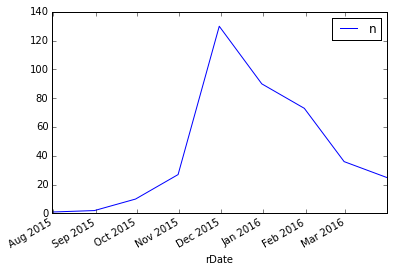

In [233]:
# Plot
tdf.plot()

In [234]:
tdf.to_csv('../out/fab_design_support_lib_800.csv')